<a href="https://githubtocolab.com/alsinmr/ConferenceExamples/blob/master/Windischleuba2023/DetectorOpt.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg"></a>

# Detector Optimization

Detectors work on the idea that a given relaxation rate constant is the result of the net of effect of all decaying terms in the correlation function, multiplied by the sensitivity of that experiment at each each correlation time. That is, if the correlation function can be written as:
\begin{equation}
C(t)=\frac15\left\langle\frac{3\cos^2\beta_{12}-1}2\right\rangle=\frac15\left[S^2+(1-S^2)\sum\limits_i{A_ie^{-t/\tau_i}}\right]
\end{equation}
For this correlation function, a given relaxation rate constant, indexed $\zeta$, may be written as:
\begin{equation}
R_{\zeta}^{(\theta,S)}=(1-S^2)\sum\limits_i{A_iR_\zeta(\tau_i)}
\end{equation}
It follows that any linear combination of relaxation rate constants, which we will denote as $\rho_n^{(\theta,S)}$ ($n$ indicates that we may calculate different linear combinations), can be written as follows:
\begin{eqnarray}
\rho_n^{(\theta,S)}&=&\sum\limits_\zeta{a_\zeta R_\zeta} \\
&=&\sum\limits_\zeta{a_\zeta(1-S^2)\sum\limits_i{A_iR_\zeta(\tau_i)}} \\
&=&(1-S^2)\sum\limits_i{A_i\sum\limits_\zeta{a_\zeta R_\zeta(\tau_i})}
\end{eqnarray}
If we define
\begin{equation}
\rho_n(\tau)=\sum\limits_\zeta{a_\zeta R_\zeta(\tau)}
\end{equation}
then we may write
\begin{equation}
\rho_n^{(\theta,S)}=(1-S^2)\sum\limits_i{A_i\rho_n(\tau_i)}
\end{equation}
Then, $\rho_n(\tau)$ defines a window of correlation times to which the *detector* $\rho_n$ is sensitive. The concept is essentially the same as the windows created by, for example, SDM's and LeMaster's approach's windows. One simply has to find the optimal windows. This may be done with the pyDIFRATE software (pyDR) automatically.

In [4]:
# # Setup for testing on my computer
# import sys
# sys.path.append('/Users/albertsmith/Documents/GitHub.nosync/')
# sys.path.append('/Users/albertsmith/Documents/GitHub/')
# import pyDR
# pyDR.Defaults['zrange']=[-13,-6,200]

In [ ]:
#Setup for Google Colab
!pip3 install MDAnalysis
!git clone https://github.com/alsinmr/pyDR.git
!git clone https://github.com/alsinmr/ConferenceExamples.git
import pyDR
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import lsq_linear as lstsq

pyDR.Defaults['zrange'] = [-13,-6,200]

import matplotlib
matplotlib.rcParams.update({'font.size':16})

## NMR sensitivities
The NMR sensitivies are obtained simply by calculating the NMR relaxation rate constant results for a single correlation time, with $1-S^2=1$.

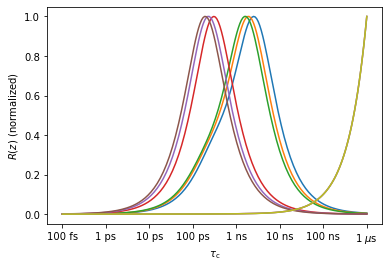

In [7]:
NMR=pyDR.Sens.NMR()   #Allocate sensitivies for NMR experiments
NMR.new_exper(Type='R1',Nuc='15N',v0=[600,800,950])
NMR.new_exper(Type='NOE',Nuc='15N',v0=[600,800,950])
NMR.new_exper(Type='R2',Nuc='15N',v0=[600,800,950])

_=NMR.plot_Rz(norm=True)  #Plot the normalized sensitivies

## Optimizing linear combinations
Optimized windows may be obtained by first decomposing the sensitivies into the $n$ largest singular components (singular value decomposition), and then constructing $n$ well-separated windows from those components. This is all done internally in the pyDIFRATE detector object.

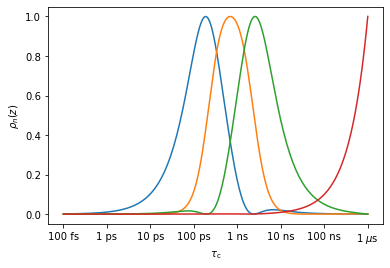

In [11]:
r=NMR.Detector()
r.r_auto(4)
_=r.plot_rhoz()

## Solution-State NMR Sensitivities
It is also possible to factor out the influence of rotational diffusion for solution-state NMR (at present, only fully implemented for isotropic diffusion). We can take the same set of experiments, and calculate the solution-NMR sensitivities, given by
\begin{equation}
R_\zeta^\mathrm{solu.}(\tau)=R_\zeta\left(\frac{\tau_\mathrm{M}\tau}{\tau_\mathrm{M}+\tau}\right)-R_\zeta(\tau_\mathrm{M})
\end{equation}

This may be achieved by converting the NMR sensitivies into solution-state NMR sensitivies, and including a correlation time of rotational diffusion ($\tau_\mathrm{M}$), which we will set to 4.84 ns here (from th data set used in the paper below).

See A.A Smith, M. Ernst, B.H. Meier, F. Ferrage, Reducing bias in the analysis of solution-state NMR data with dynamics detectors. [*J. Chem. Phys.* vol. 151, 034102 (2019)](https://aip.scitation.org/doi/abs/10.1063/1.5111081) 

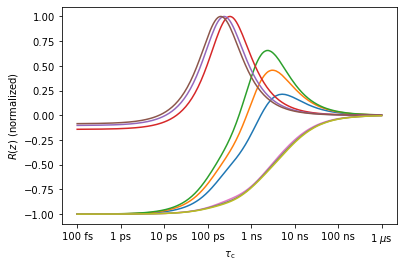

In [30]:
solNMR=pyDR.Sens.SolnNMR(info=NMR.info)
solNMR.info['tM']=4.84e-9
solNMR.info['stdev']=[1,1,1,1,1,1,10,10,10]
_=solNMR.plot_Rz(norm=True)

As with the NMR sensitivies, we may find optimized linear combinations of the resulting functions.

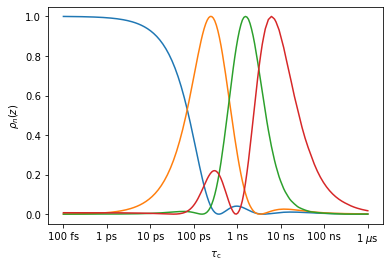

In [31]:
r_soln=solNMR.Detector()
r_soln.r_auto(4)
_=r_soln.plot_rhoz()